## **Step 1: Import Libraries & Load Dataset**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_csv('/content/sentimentdataset.csv')

print("Columns:\n", df.columns)
print("\nSample Data:\n", df.head())


Columns:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

Sample Data:
    Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Step 2: Basic Dataset Exploration**

In [12]:

print(f"Dataset shape: {df.shape}\n")
print(df.info())


print("\nMissing values per column:")
print(df.isnull().sum())


print("\nNumeric summary stats:")
print(df.describe())

print("\nSentiment distribution:")
print(df['Sentiment'].value_counts())


Dataset shape: (732, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None

Missing values per column:
Unnamed: 0.1    0
Unnamed: 0      0
Text  

# **Step 3: Data Cleaning and Text Preprocessing**

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)

print("\nOriginal vs Cleaned Text samples:")
print(df[['Text', 'clean_text']].head())



Original vs Cleaned Text samples:
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                         clean_text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


# **Step 4: Visualizing Sentiment Distribution**

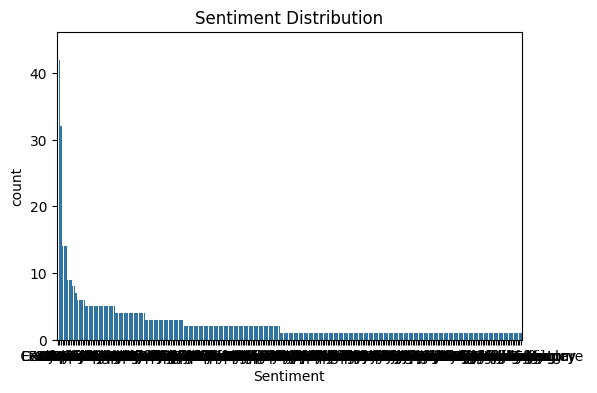

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.show()


# **Step 6: Top Hashtags Analysis**

Top 10 Hashtags:
#compassionate #tearsofempathy: 3
#proud #scalingpeaks: 3
#hopeful #seedsofoptimism: 3
#playful #carnivalescapade: 3
#love #spreadlove: 2
#shame #injustice: 2
#disgust #corruption: 2
#acceptance #lifejourney: 2
#frustration #emotionaloutburst: 2
#numbness #emotionalshield: 2


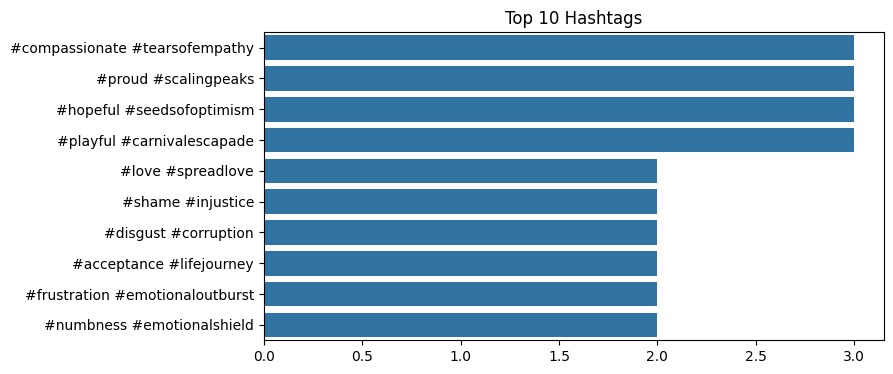

In [16]:
df['Hashtags'] = df['Hashtags'].fillna('')

all_hashtags = df['Hashtags'].str.cat(sep=',').split(',')
from collections import Counter
hashtag_counts = Counter([tag.strip().lower() for tag in all_hashtags if tag.strip() != ''])
top_hashtags = hashtag_counts.most_common(10)
print("Top 10 Hashtags:")
for tag, count in top_hashtags:
    print(f"{tag}: {count}")
tags, counts = zip(*top_hashtags)
plt.figure(figsize=(8,4))
sns.barplot(x=list(counts), y=list(tags))
plt.title("Top 10 Hashtags")
plt.show()


# **Step 7: Time Series Analysis — Tweets Over Time**

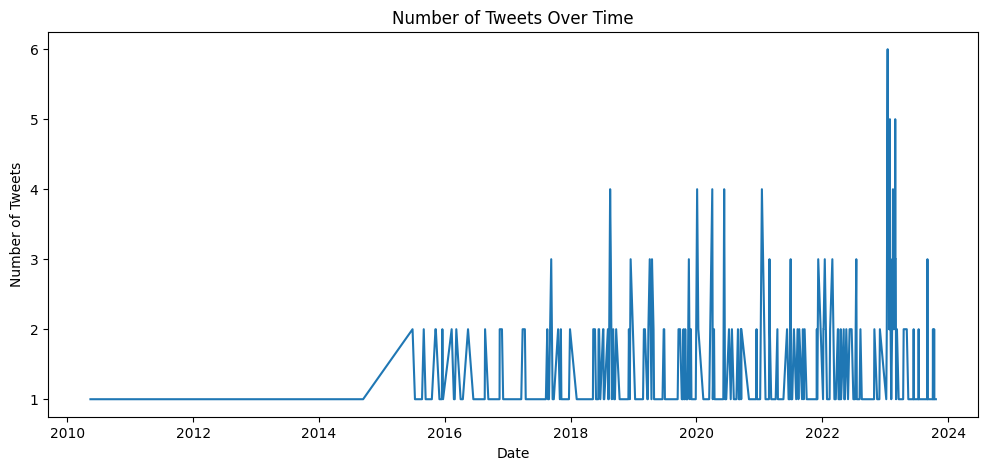

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

tweets_per_day = df.groupby(df['Timestamp'].dt.date).size()

plt.figure(figsize=(12,5))
tweets_per_day.plot()
plt.title("Number of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


# **Step 8: Sentiment Trend Over Time**

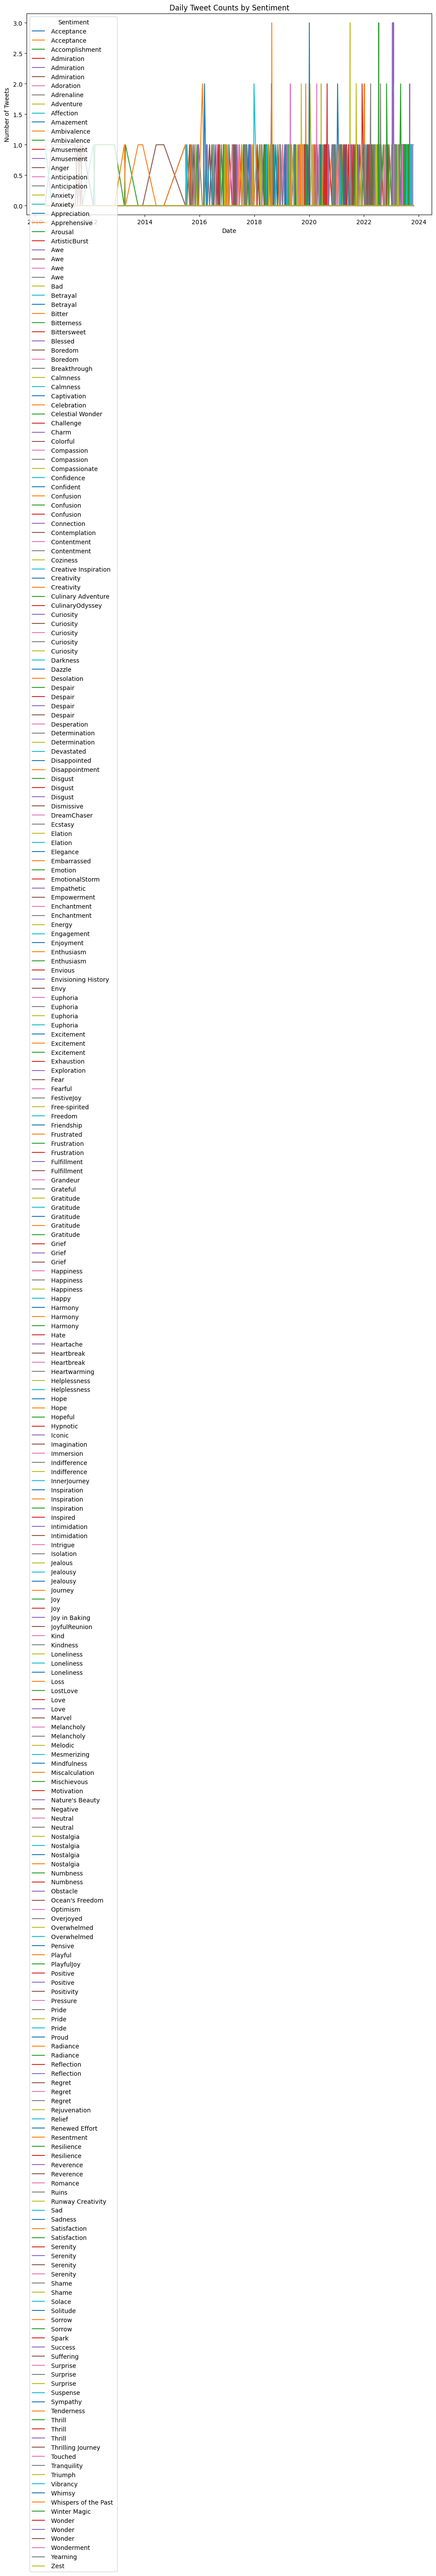

In [18]:
daily_sentiment = df.groupby([df['Timestamp'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

daily_sentiment.plot(figsize=(12,6))
plt.title("Daily Tweet Counts by Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


# **Step 9: Correlations and Insights**

Correlation matrix:
                   Retweets     Likes  Sentiment_encoded
Retweets           1.000000  0.998482           0.314041
Likes              0.998482  1.000000           0.308036
Sentiment_encoded  0.314041  0.308036           1.000000


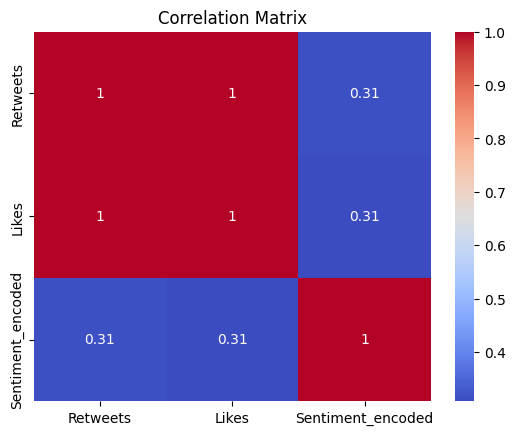

In [19]:
sentiment_map = {label: idx for idx, label in enumerate(df['Sentiment'].unique())}
df['Sentiment_encoded'] = df['Sentiment'].map(sentiment_map)

corr = df[['Retweets', 'Likes', 'Sentiment_encoded']].corr()
print("Correlation matrix:")
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


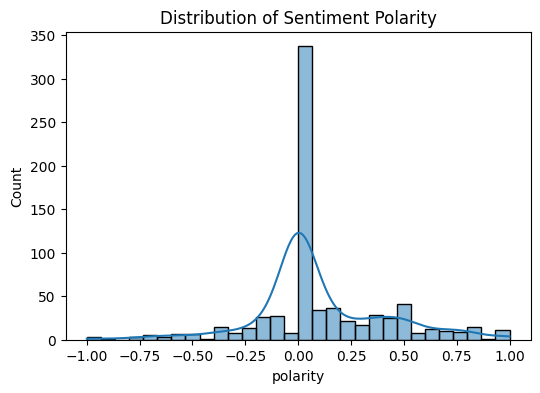

In [20]:
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['Text'].apply(get_polarity)

plt.figure(figsize=(6,4))
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.show()
